In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
##model from sickit learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

##model evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import plot_roc_curve


In [2]:
df = pd.read_csv("heart-disease_5.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


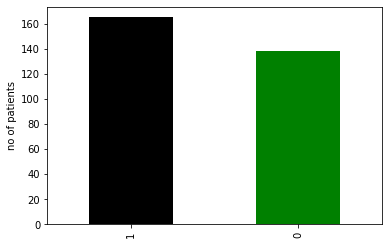

In [7]:
df["target"].value_counts().plot(kind = "bar",color=["black","green"]);
plt.ylabel("no of patients");

# finding patterns 

In [8]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


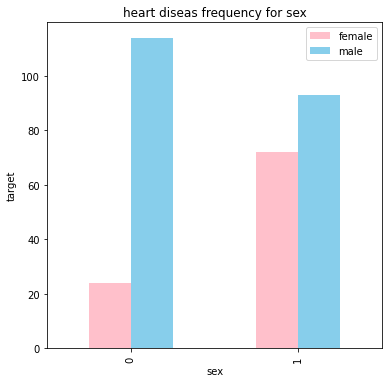

In [10]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",color =["pink","skyblue"],figsize =(6,6))
plt.title("heart diseas frequency for sex")
plt.xlabel("sex")
plt.ylabel("target")
plt.legend(["female","male"]);

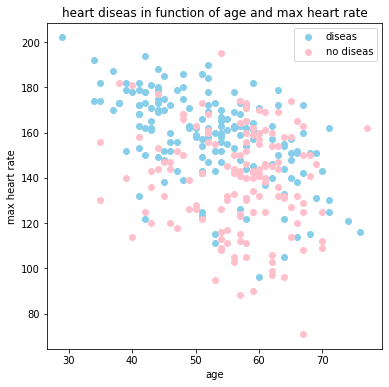

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target==1],
           c= "skyblue");
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target==0],
           c= "pink");
plt.title("heart diseas in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["diseas","no diseas"]);

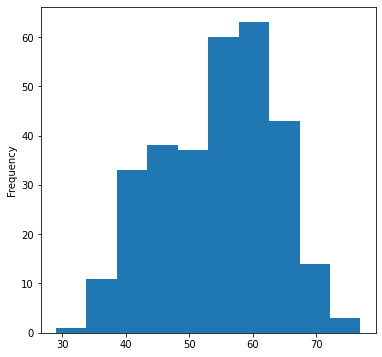

In [12]:
df.age.plot.hist(figsize =(6,6));

In [13]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


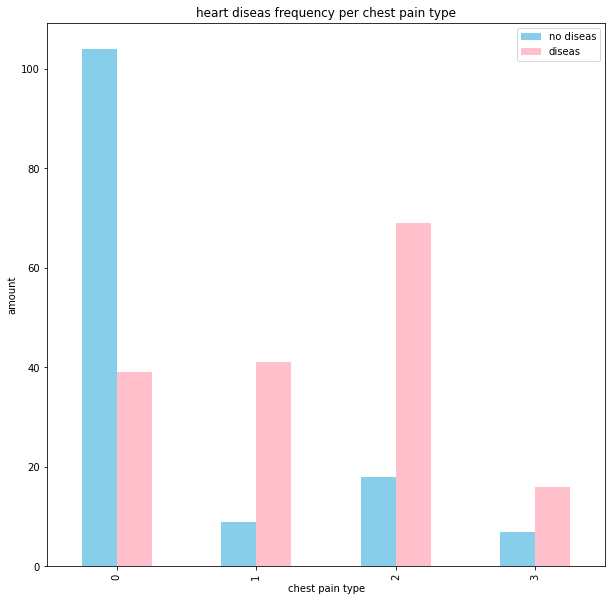

In [14]:
pd.crosstab(df.cp,df.target).plot(kind ="bar",figsize=(10,10),
                                 color =["skyblue","pink"])
plt.title("heart diseas frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no diseas", "diseas"]);

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


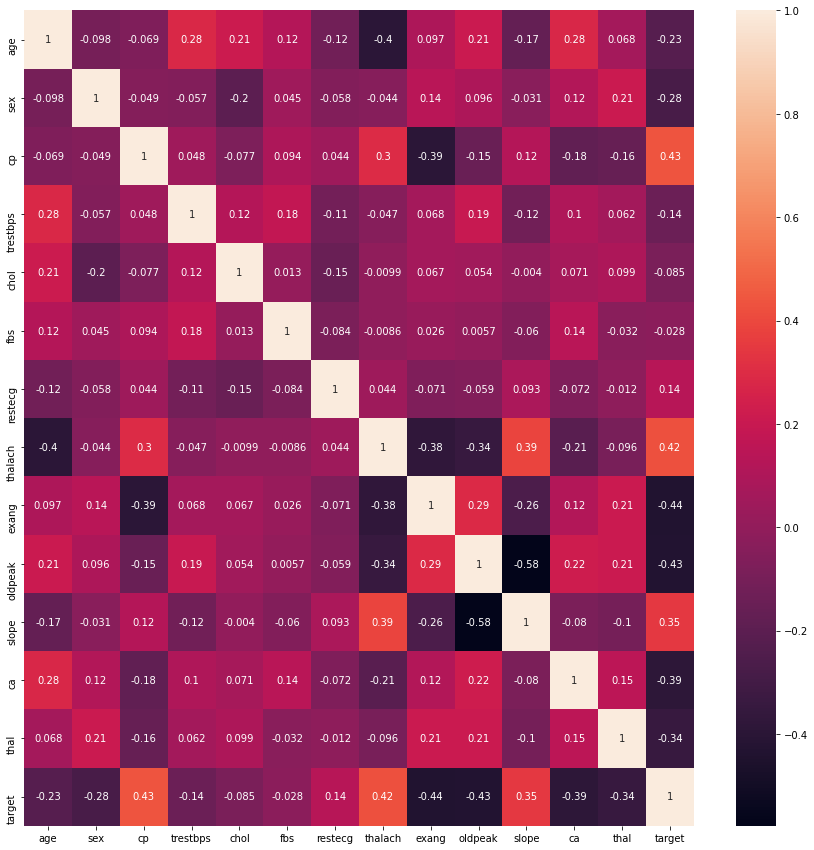

In [16]:
plt.figure(figsize =(15,15))
sns.heatmap(df.corr(),annot = True);



# splitting the data 

In [17]:
x=df.drop("target",axis = 1)
y = df["target"]


In [18]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [20]:
len(df)

303

# logistic regression

Fitting the model

In [21]:
np.random.seed(42)
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8852459016393442

In [22]:
def evaluate(y_true,y_pred):
    print("accuracy is:",accuracy_score(y_true,y_pred)*100,"%")
    print("recall_score is:",recall_score(y_true,y_pred))
    print("precision is:",precision_score(y_true,y_pred))
    print("f1_score is:",f1_score(y_true,y_pred))

In [23]:
np.random.seed(42)
log_preds = model.predict(x_test)
log_preds

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [24]:
log_score=evaluate(y_test,log_preds)
log_score
accuracy=(cross_val_score(model,x,y,cv=5).mean()*100)
print("cv accuracy is",accuracy)

accuracy is: 88.52459016393442 %
recall_score is: 0.975
precision is: 0.8666666666666667
f1_score is: 0.9176470588235294
cv accuracy is 82.81967213114754


In [25]:
p={"C": np.logspace(-4, 4, 20),
  "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
  }
rs_cv = RandomizedSearchCV(estimator = model ,
                           param_distributions = p,
                           n_iter = 10,cv = 5,verbose = 2)
rs_cv.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................C=545.5594781168514, solver=sag; total time=   0.1s
[CV] END ....................C=545.5594781168514, solver=sag; total time=   0.0s
[CV] END ....................C=545.5594781168514, solver=sag; total time=   0.0s
[CV] END ....................C=545.5594781168514, solver=sag; total time=   0.0s
[CV] END ....................C=545.5594781168514, solver=sag; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END ..............C=78.47599703514607, solver=newton-cg; total time=   0.0s
[CV] END ..............C=78.47599703514607, solv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=2)

In [26]:
rs_cv.best_params_


{'solver': 'newton-cg', 'C': 0.615848211066026}

In [27]:
p={"C": [11.288378916846883],
  "solver":[ "lbfgs"]
  }
rs_cv = RandomizedSearchCV(estimator = model ,
                           param_distributions = p,
                           n_iter = 10,cv = 5,verbose = 2)
rs_cv.fit(x_train,y_train)
rs_cv_preds = rs_cv.predict(x_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.0s
[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.2s
[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.1s
[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.2s
[CV] END .................C=11.288378916846883, solver=lbfgs; total time=   0.1s


In [28]:
log_score=evaluate(y_test,rs_cv_preds)
log_score
accuracy=(cross_val_score(model,x,y,cv=5).mean()*100)
print("cv accuracy is",accuracy)

accuracy is: 90.1639344262295 %
recall_score is: 0.975
precision is: 0.8863636363636364
f1_score is: 0.9285714285714285
cv accuracy is 82.81967213114754


# RANDOM FOREST CLASSIFIER

In [29]:
np.random.seed(42)
model_1 = RandomForestClassifier()
model_1.fit(x_train,y_train)
model_1.score(x_test,y_test)

0.9016393442622951

In [30]:
np.random.seed(42)
loga_preds = model_1.predict(x_test)
loga_preds

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
loga_score=evaluate(y_test,loga_preds)
loga_score
accuracy=(cross_val_score(model_1,x,y,cv=5).mean()*100)
print("cv accuracy is",accuracy)

accuracy is: 90.1639344262295 %
recall_score is: 0.9
precision is: 0.9473684210526315
f1_score is: 0.9230769230769231
cv accuracy is 82.48087431693989


# Tuning hyperparameter

In [32]:
grid ={"n_estimators":[10,100,200,500,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]
      }


In [33]:
rs_clf = RandomizedSearchCV(estimator= model_1,
                           param_distributions= grid,
                           n_iter = 10,cv = 5,verbose= 2)
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; t

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1200]},
                   verbose=2)

In [34]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 5}

In [35]:
grid = {"n_estimators": [500],
 "min_samples_split": [2],
 "min_samples_leaf": [1],
 "max_features": ["auto"],
 "max_depth": [30]}
rs_clf = RandomizedSearchCV(estimator= model_1,
                           param_distributions= grid,
                           n_iter = 10,cv = 5,verbose= 2)
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.0s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [30],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [500]},
                   verbose=2)

In [36]:
rs_clf_preds = rs_clf.predict(x_test)

In [37]:
loga_score=evaluate(y_test,rs_clf_preds)
loga_score
accuracy=(cross_val_score(model_1,x,y,cv=5).mean()*100)
print("cv accuracy is",accuracy)

accuracy is: 90.1639344262295 %
recall_score is: 0.9
precision is: 0.9473684210526315
f1_score is: 0.9230769230769231
cv accuracy is 82.81967213114754


# KNEIGHBORS

In [38]:
np.random.seed(42)
model_2 = KNeighborsClassifier()
model_2.fit(x_train,y_train)
model_2.score(x_test,y_test)

0.7377049180327869

In [39]:
np.random.seed(42)
logan_preds = model_2.predict(x_test)
logan_preds

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [40]:
logan_score=evaluate(y_test,logan_preds)
logan_score
accuracy=(cross_val_score(model_2,x,y,cv=5).mean()*100)
print("cv accuracy is",accuracy)

accuracy is: 73.77049180327869 %
recall_score is: 0.75
precision is: 0.8333333333333334
f1_score is: 0.7894736842105262
cv accuracy is 64.38797814207649


# tuning hyperparameters

In [41]:
prams={"weights":["uniform", "distance"],
       "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
       "n_neighbors":[5,23,100,45,100]}
rv=RandomizedSearchCV(model_2,prams,cv=5,n_iter=20,verbose=2)
rv.fit(x_train,y_train)
       

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END algorithm=ball_tree, n_neighbors=100, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=100, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=100, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=100, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=100, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=45, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=45, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=45, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=45, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=45, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=100, weights=distance; total time=   0.0s
[CV] END algorithm=ball_

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [5, 23, 100, 45, 100],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [42]:
rv.best_params_

{'weights': 'distance', 'n_neighbors': 23, 'algorithm': 'ball_tree'}

In [43]:
prams={"weights":["uniform"],
       "algorithm":["auto"],
       "n_neighbors":[5]}
rv=RandomizedSearchCV(model_2,prams,cv=5,n_iter=20,verbose=2)
rv.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.0s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['auto'],
                                        'n_neighbors': [5],
                                        'weights': ['uniform']},
                   verbose=2)

In [44]:
rv_preds = rv.predict(x_test)

In [45]:
logan_score=evaluate(y_test,rv_preds)
logan_score
accuracy=(cross_val_score(model_2,x,y,cv=5).mean()*100)
print("cv accuracy is",accuracy)

accuracy is: 73.77049180327869 %
recall_score is: 0.75
precision is: 0.8333333333333334
f1_score is: 0.7894736842105262
cv accuracy is 64.38797814207649


In [46]:
compare_metrics = pd.DataFrame({"kneighborclassifier":rv_preds ,
                               "randomforestclassifier":rs_clf_preds,
                               "logisticregression":rs_cv_preds})
compare_metrics

,kneighborclassifier,randomforestclassifier,logisticregression
0,1,1,1
1,1,1,1
2,1,0,0
3,0,0,0
4,1,1,1
...,...,...,...
56,0,0,0
57,0,0,0
58,0,0,0
59,1,1,1


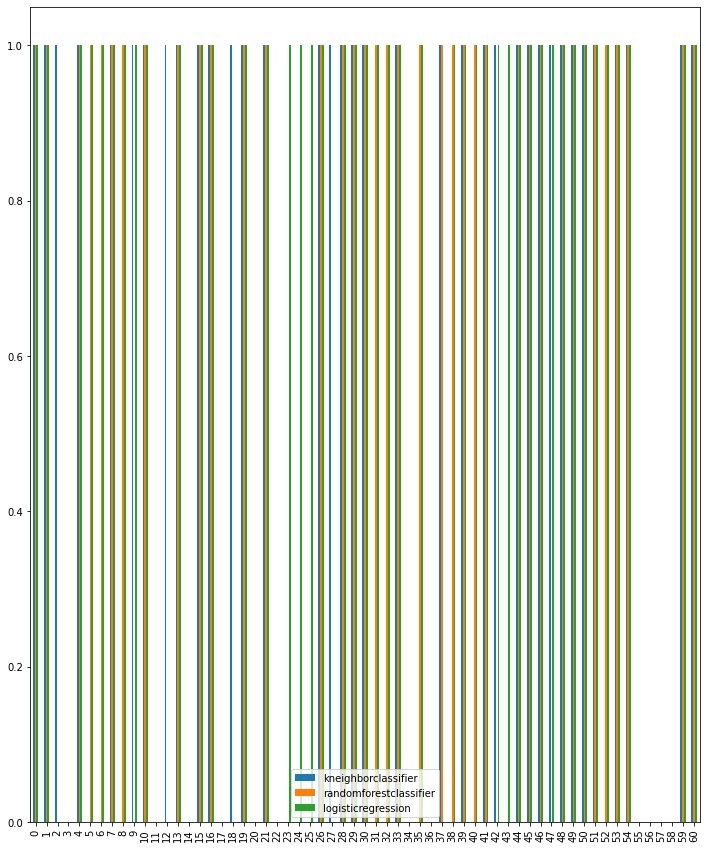

In [50]:
compare_metrics.plot.bar(figsize=(12,15));